## Data exploration

This notebook contains:
- Code to perform exploratory data analysis of the two chosen datasets:
    - DAIGT V4: https://www.kaggle.com/datasets/thedrcat/daigt-v4-train-dataset
    - LLM - Detect AI Datamix: https://www.kaggle.com/datasets/conjuring92/ai-mix-v26?rvi=1
- Code to visualize the results

In [1]:
# Sources/tools used in this file:
# - GitHub Copilot
# - https://pypi.org/project/matplotlib-venn/

import pandas as pd

daigt_v4_data = pd.read_csv("data/daigt_v4.csv")
detect_ai_data = pd.read_csv("data/detect_ai.csv")

In [2]:
print("DAIGT V4 data head:")
print(daigt_v4_data.head())
print("\n\nDetect AI data head:")
print(detect_ai_data.head())

DAIGT V4 data head:
                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

          prompt_name           source  RDizzl3_seven  model  
0  Phones and driving  persuade_corpus          False  human  
1  Phones and driving  persuade_corpus          False  human  
2  Phones and driving  persuade_corpus          False  human  
3  Phones and driving  persuade_corpus          False  human  
4  Phones and driving  persuade_corpus          False  human  


Detect AI data head:
           id  prompt_id                                               text  \
0  e_ddxvqx5i          0  In recent years, there has been a growing move...   
1  e_hi0yzrcv          0  ---\nWhy not car

In [3]:
print(f"DAIGT V4 total entries: {len(daigt_v4_data)}")
print(f"Detect AI total entries: {len(detect_ai_data)}")

DAIGT V4 total entries: 73573
Detect AI total entries: 165767


In [11]:
daigt_v4_label_0_data = daigt_v4_data[daigt_v4_data["label"] == 0]
daigt_v4_label_1_data = daigt_v4_data[daigt_v4_data["label"] == 1]
detect_ai_data_label_0_data = detect_ai_data[detect_ai_data["generated"] == 0]
detect_ai_data_label_1_data = detect_ai_data[detect_ai_data["generated"] == 1]


daigt_v4_data_label_0_count = len(daigt_v4_label_0_data)
daigt_v4_data_label_1_count = len(daigt_v4_label_1_data)
detect_ai_data_label_0_count = len(detect_ai_data_label_0_data)
detect_ai_data_label_1_count = len(detect_ai_data_label_1_data)


daigt_v4_data_label_0_min_text_len = daigt_v4_label_0_data["text"].apply(len).min()
daigt_v4_data_label_1_min_text_len = daigt_v4_label_1_data["text"].apply(len).min()
detect_ai_data_label_0_min_text_len = detect_ai_data_label_0_data["text"].apply(len).min()
detect_ai_data_label_1_min_text_len = detect_ai_data_label_1_data["text"].apply(len).min()


daigt_v4_data_label_0_max_text_len = daigt_v4_label_0_data["text"].apply(len).max()
daigt_v4_data_label_1_max_text_len = daigt_v4_label_1_data["text"].apply(len).max()
detect_ai_data_label_0_max_text_len = detect_ai_data_label_0_data["text"].apply(len).max()
detect_ai_data_label_1_max_text_len = detect_ai_data_label_1_data["text"].apply(len).max()


daigt_v4_data_label_0_mean_text_len = daigt_v4_label_0_data["text"].apply(len).mean()
daigt_v4_data_label_1_mean_text_len = daigt_v4_label_1_data["text"].apply(len).mean()
detect_ai_data_label_0_mean_text_len = detect_ai_data_label_0_data["text"].apply(len).mean()
detect_ai_data_label_1_mean_text_len = detect_ai_data_label_1_data["text"].apply(len).mean()


daigt_v4_data_label_0_any_null_empty = daigt_v4_label_0_data["text"].isnull().any() or daigt_v4_label_0_data["text"].apply(len).eq(0).any()
daigt_v4_data_label_1_any_null_empty = daigt_v4_label_1_data["text"].isnull().any() or daigt_v4_label_1_data["text"].apply(len).eq(0).any()
detect_ai_data_label_0_any_null_empty = detect_ai_data_label_0_data["text"].isnull().any() or detect_ai_data_label_0_data["text"].apply(len).eq(0).any()
detect_ai_data_label_1_any_null_empty = detect_ai_data_label_1_data["text"].isnull().any() or detect_ai_data_label_1_data["text"].apply(len).eq(0).any()

daigt_v4_data_label_0_contains_duplicates = daigt_v4_label_0_data["text"].duplicated().any()
daigt_v4_data_label_1_contains_duplicates = daigt_v4_label_1_data["text"].duplicated().any()
detect_ai_data_label_0_contains_duplicates = detect_ai_data_label_0_data["text"].duplicated().any()
detect_ai_data_label_1_contains_duplicates = detect_ai_data_label_1_data["text"].duplicated().any()

print(f"{'':<20s}{'|':<15s}{'DAIGT V4':<20s}{'|':<15s}{'Detect AI':<20s}|")
print(f"{'':<20s}{'|':<5s}{'Human':<13s}{'|':<7s}{'LLM/AI':<10s}{'|':<5s}{'Human':<13s}{'|':<7s}{'LLM/AI':<10s}|")
print(f"{'-' * 20}{'|'}{'-' * 17}{'+'}{'-' * 16}{'+'}{'-' * 17}{'+'}{'-' * 16}{'|'}")
print(f"{'Count':<20s}{'|':<5s}{daigt_v4_data_label_0_count:<13d}{'|':<7s}{daigt_v4_data_label_1_count:<10d}{'|':<5s}{detect_ai_data_label_0_count:<13d}{'|':<7s}{detect_ai_data_label_1_count:<10d}|")
print(f"{'Any null or empty':<20s}{'|':<5s}{str(daigt_v4_data_label_0_any_null_empty):<13s}{'|':<7s}{str(daigt_v4_data_label_1_any_null_empty):<10s}{'|':<5s}{str(detect_ai_data_label_0_any_null_empty):<13s}{'|':<7s}{str(detect_ai_data_label_1_any_null_empty):<10s}|")
print(f"{'Contains duplicates':<20s}{'|':<5s}{str(daigt_v4_data_label_0_contains_duplicates):<13s}{'|':<7s}{str(daigt_v4_data_label_1_contains_duplicates):<10s}{'|':<5s}{str(detect_ai_data_label_0_contains_duplicates):<13s}{'|':<7s}{str(detect_ai_data_label_1_contains_duplicates):<10s}|")
print(f"{'Min text length':<20s}{'|':<5s}{daigt_v4_data_label_0_min_text_len:<13d}{'|':<7s}{daigt_v4_data_label_1_min_text_len:<10d}{'|':<5s}{detect_ai_data_label_0_min_text_len:<13d}{'|':<7s}{detect_ai_data_label_1_min_text_len:<10d}|")
print(f"{'Max text length':<20s}{'|':<5s}{daigt_v4_data_label_0_max_text_len:<13d}{'|':<7s}{daigt_v4_data_label_1_max_text_len:<10d}{'|':<5s}{detect_ai_data_label_0_max_text_len:<13d}{'|':<7s}{detect_ai_data_label_1_max_text_len:<10d}|")
print(f"{'Mean text length':<20s}{'|':<5s}{daigt_v4_data_label_0_mean_text_len:<13.2f}{'|':<7s}{daigt_v4_data_label_1_mean_text_len:<10.2f}{'|':<5s}{detect_ai_data_label_0_mean_text_len:<13.2f}{'|':<7s}{detect_ai_data_label_1_mean_text_len:<10.2f}|")


                    |              DAIGT V4            |              Detect AI           |
                    |    Human        |      LLM/AI    |    Human        |      LLM/AI    |
--------------------|-----------------+----------------+-----------------+----------------|
Count               |    27370        |      46203     |    36245        |      129522    |
Any null or empty   |    False        |      False     |    False        |      False     |
Contains duplicates |    False        |      False     |    True         |      True      |
Min text length     |    187          |      152       |    347          |      256       |
Max text length     |    18322        |      8869      |    36191        |      27098     |
Mean text length    |    2346.78      |      2275.82   |    2333.07      |      2235.76   |


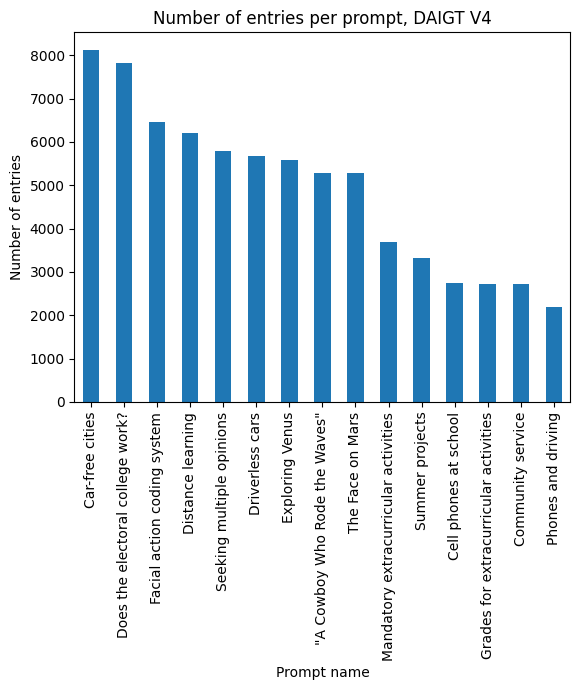

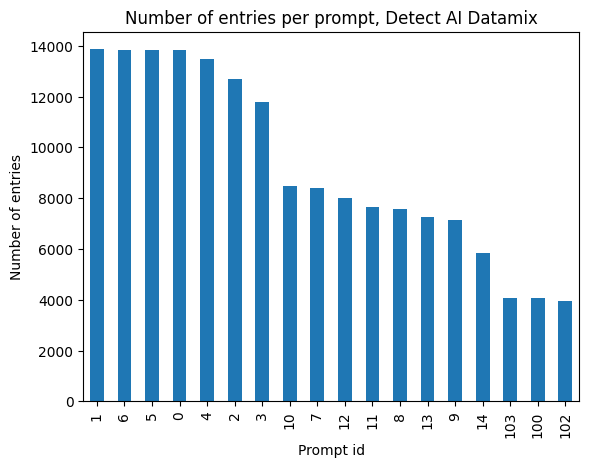

In [5]:
import matplotlib.pyplot as plt

prompt_counts_daigt_v4 = daigt_v4_data["prompt_name"].value_counts()

prompt_counts_daigt_v4.plot(kind="bar", title="Number of entries per prompt, DAIGT V4")
plt.xlabel("Prompt name")
plt.ylabel("Number of entries")
plt.show()

prompt_counts_detect_ai = detect_ai_data["prompt_id"].value_counts()

prompt_counts_detect_ai.plot(kind="bar", title="Number of entries per prompt, Detect AI Datamix")
plt.xlabel("Prompt id")
plt.ylabel("Number of entries")
plt.show()


Number of texts written by humans: 27370
Number of texts generated by LLMs: 46203


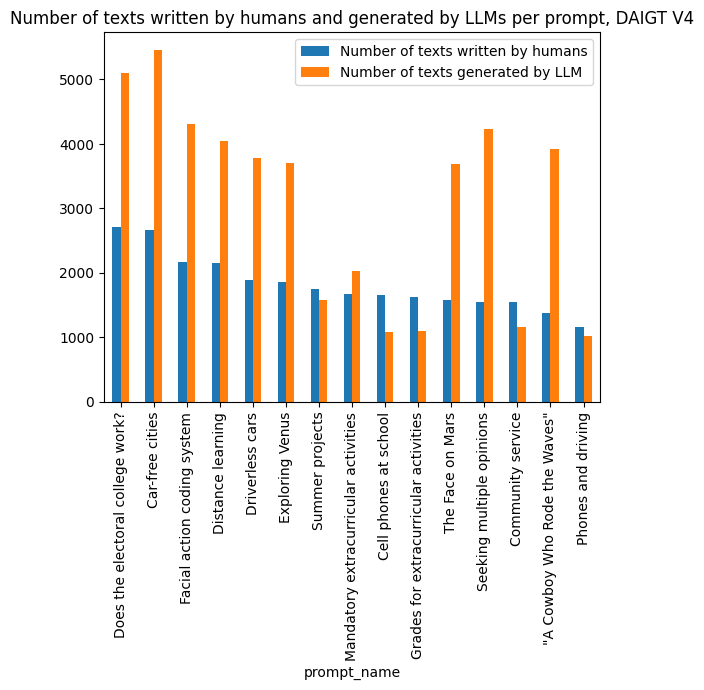

Number of texts written by humans: 36245
Number of texts generated by LLMs: 129522


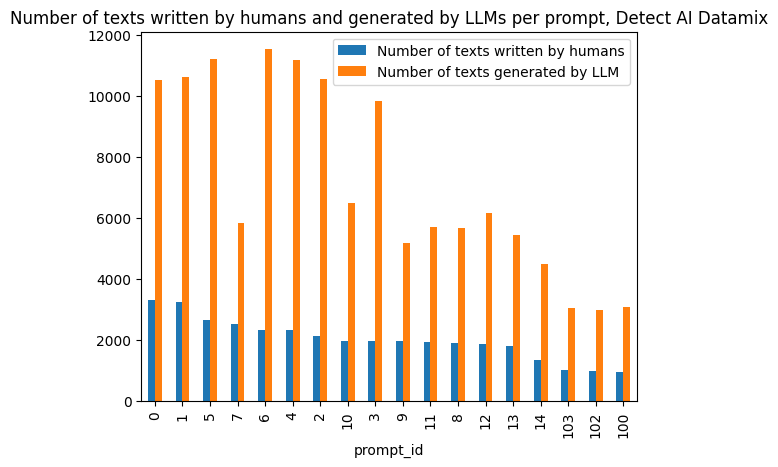

In [6]:
daigt_v4_label_0_data = daigt_v4_data[daigt_v4_data["label"] == 0]
daigt_v4_label_1_data = daigt_v4_data[daigt_v4_data["label"] == 1]

print(f"Number of texts written by humans: {len(daigt_v4_label_0_data)}")
print(f"Number of texts generated by LLMs: {len(daigt_v4_label_1_data)}")

combined_data = pd.concat([daigt_v4_label_0_data["prompt_name"].value_counts(), daigt_v4_label_1_data["prompt_name"].value_counts()], axis=1)
combined_data.columns = ["Number of texts written by humans", "Number of texts generated by LLM"]

combined_data.plot(kind="bar", title="Number of texts written by humans and generated by LLMs per prompt, DAIGT V4")
plt.show()

detect_ai_label_0_data = detect_ai_data[detect_ai_data["generated"] == 0]
detect_ai_label_1_data = detect_ai_data[detect_ai_data["generated"] == 1]

print(f"Number of texts written by humans: {len(detect_ai_label_0_data)}")
print(f"Number of texts generated by LLMs: {len(detect_ai_label_1_data)}")

combined_data = pd.concat([detect_ai_label_0_data["prompt_id"].value_counts(), detect_ai_label_1_data["prompt_id"].value_counts()], axis=1)
combined_data.columns = ["Number of texts written by humans", "Number of texts generated by LLM"]

combined_data.plot(kind="bar", title="Number of texts written by humans and generated by LLMs per prompt, Detect AI Datamix")
plt.show()


Venn diagram of datasets
132375


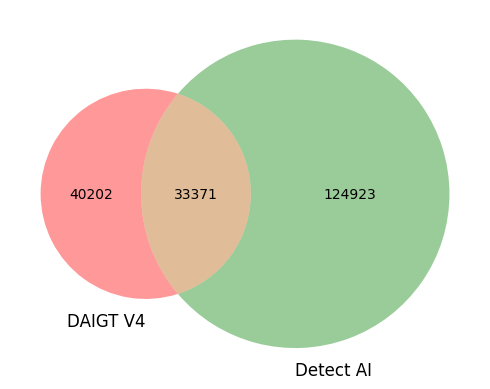

In [8]:
from matplotlib_venn import venn2

# Relative sizes of the datasets and intersections of entries

daigt_v4_data_set = set(daigt_v4_data['text'])
detect_ai_data_set = set(detect_ai_data['text']) # Also removes duplicates

print("Venn diagram of datasets")
venn2([daigt_v4_data_set, detect_ai_data_set], ('DAIGT V4', 'Detect AI'))


num_rows = len(detect_ai_data[~detect_ai_data['text'].isin(daigt_v4_data['text'])])
print(num_rows)


In [9]:
# Checking samples of prompts in the DAIGT V4

prompts_in_daigt_v4 = daigt_v4_data["prompt_name"].unique()

print(prompts_in_daigt_v4)

for prompt in prompts_in_daigt_v4:
    print(f"\nPrompt: {prompt}\n")
    samples = daigt_v4_data[daigt_v4_data["prompt_name"] == prompt].sample(3)
    for sample in samples.iterrows():
        print(f"Sample index {sample[0]}: \n{sample[1]['text'][:200]}")
        print(f"{'-' * 20}\n")
    print(f"{'-' * 200}\n")

['Phones and driving' 'Car-free cities' 'Summer projects'
 '"A Cowboy Who Rode the Waves"' 'Mandatory extracurricular activities'
 'Exploring Venus' 'Facial action coding system' 'The Face on Mars'
 'Community service' 'Grades for extracurricular activities'
 'Driverless cars' 'Does the electoral college work?'
 'Cell phones at school' 'Distance learning' 'Seeking multiple opinions']

Prompt: Phones and driving

Sample index 256: 
Texting and driving has become more of a problem as time goes on. With the large growth of technology use, almost everyone has access to a phone while driving. There are many reasons you should choose
--------------------

Sample index 524: 
Why Phones Shouldn't Be Used While Driving.

Thanks to technological advancements, here in the twenty-first century we have instant access to other humans, modern healthcare and even quick transportat
--------------------

Sample index 36889: 
As a high school student, I believe that drivers should not be able to use cell

In [10]:
prompts_in_detect_ai = detect_ai_data["prompt_id"].unique()

for prompt in prompts_in_detect_ai:
    print(f"\nPrompt: {prompt}\n")
    samples = detect_ai_data[detect_ai_data["prompt_id"] == prompt].sample(3)
    for sample in samples.iterrows():
        print(f"Sample index {sample[0]}: \n{sample[1]['text'][:200]}")
        print(f"{'-' * 20}\n")
    print(f"{'-' * 200}\n")


Prompt: 0

Sample index 9024: 
Fellow citizens, the advantages of limiting car usage are many and far-reaching. Using only one source, the passage below reveals that reducing car usage is an effective method to lower carbon emissio
--------------------

Sample index 4129: 
You know what I do agree on what this article is saying why because people tend to use their cars all the time and yea what if we live far from town ok that's fine but I see people in my neighborhood 
--------------------

Sample index 3180: 
According to the article, fellow citizens are imformed about the advangtages and the enviromental issues that is limited. People are also getting from point A to point B without cars can actually be g
--------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Prompt: 1

Sample index 19954: 
Dear, Florida Senator

I